# Logistic Regression Assignment

- Run the below cells. If you have the data in a different directory, you'll need to change the url.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

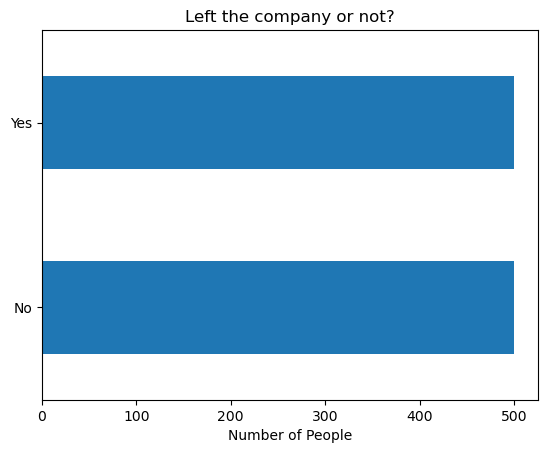

In [2]:
# insert code
df['left_company'].value_counts().plot.barh()
plt.title('Left the company or not?')
plt.xlabel('Number of People')
plt.show()

Insert comments here

When observation in one class is higher than in other classes, a class imbalance exists. But here we could see there are equal number of observations for both the classes.

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [ ]:
# numerical_vars = []
# categorical_Vars = []

In [3]:
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


In [4]:
df.dtypes

left_company                     object
age                               int64
frequency_of_travel              object
department                       object
commuting_distance                int64
education                         int64
satisfaction_with_environment     int64
gender                           object
seniority_level                   int64
position                         object
satisfaction_with_job             int64
married_or_single                object
last_raise_pct                    int64
last_performance_rating           int64
total_years_working               int64
years_at_company                  int64
years_in_current_job              int64
years_since_last_promotion        int64
years_with_current_supervisor     int64
dtype: object

In [5]:
features = [x for x in df.columns if x != 'left_company']
categorical_vars = [col for col in df[features].columns if df[col].dtype == 'object']
numerical_vars = [col for col in df[features].columns if col not in categorical_vars]

In [6]:
# print(f'Features in df:{features}')
print(f'\ncategorical variables in df:{categorical_vars}')
print(f'\nnumerical variables in df:{numerical_vars}')


categorical variables in df:['frequency_of_travel', 'department', 'gender', 'position', 'married_or_single']

numerical variables in df:['age', 'commuting_distance', 'education', 'satisfaction_with_environment', 'seniority_level', 'satisfaction_with_job', 'last_raise_pct', 'last_performance_rating', 'total_years_working', 'years_at_company', 'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor']


Insert comments here

Any column that has datatype as 'object' is included in Categorical features. Rest of the columns that are not included in Categorical features are considered as Numerical features

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

In [7]:
# insert code here

In [9]:
import seaborn as sns

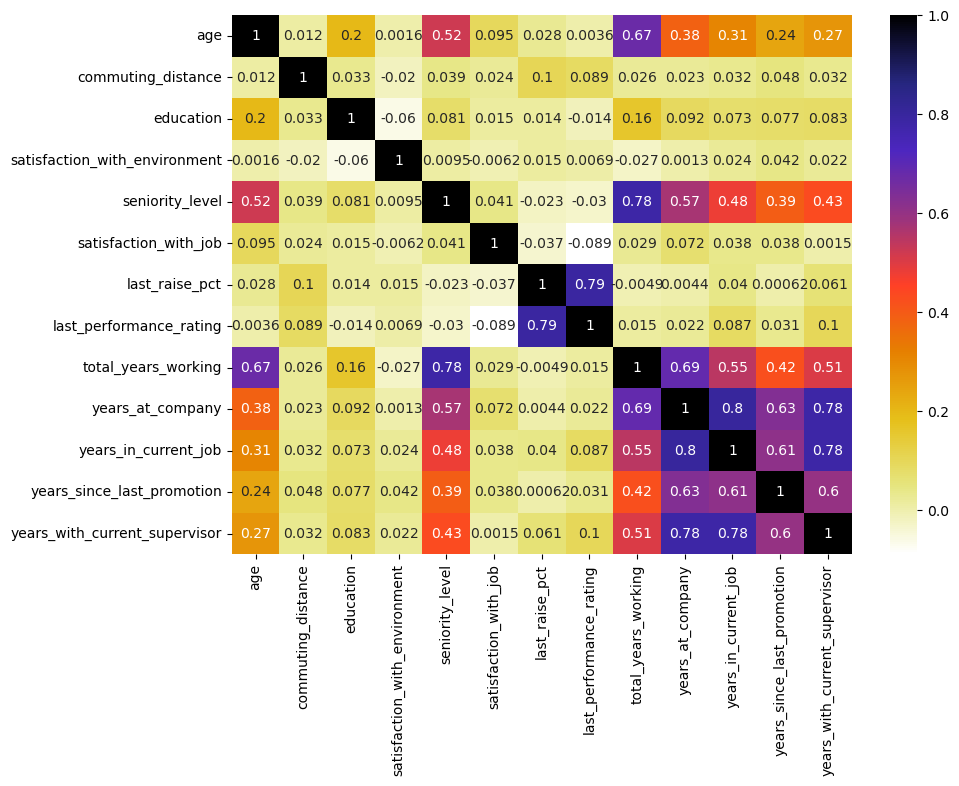

In [10]:
plt.figure(figsize=(10,7))
cor = df[numerical_vars].corr()
sns.heatmap(cor, annot=True, cmap = plt.cm.CMRmap_r)
plt.show()

Insert comments here

Here I found out correlation using pearson correlation. The default method used is pearson. The correlation coefficient with values from 0.9 to 1(-0.9 to -1 ) is considered a very high positive correlation. Since none of these values ranges between the values mentioned I chose not to drop any columns

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [11]:
# insert code here

In [12]:
from sklearn.model_selection import train_test_split

def generate_splits():
    y = df['left_company']
    X = df[[x for x in df.columns if x!= 'left_company']]

    return train_test_split(X, y, test_size=0.2, random_state=124)

X_train, X_test, y_train, y_test = generate_splits()

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 800
Test examples: 200


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

In [14]:
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_vars),
                                          ('create_dummies', cat_pipeline, categorical_vars)])

In [15]:
X_train_processed = processing_pipeline.fit_transform(X_train)

# Print the shapes of the resulting transformed arrays
print("Numerical data shape after preprocessing:", X_train_processed[:, :2].shape)
print("Categorical data shape after preprocessing:", X_train_processed[:, 2:].shape)

Numerical data shape after preprocessing: (800, 2)
Categorical data shape after preprocessing: (800, 26)


# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [16]:
# insert code here

In [17]:
from sklearn.linear_model import LogisticRegression
modeling_pipeline = Pipeline([('data_processing', processing_pipeline),('logreg', LogisticRegression())])
m = modeling_pipeline.fit(X_train, y_train)

In [18]:
# leftcompany_predictionsTest = m.predict(X_train)
leftcompany_predictionsTest = m.predict(X_test)
leftcompany_predictionsTrain = m.predict(X_train)

In [20]:
from sklearn.metrics import accuracy_score
print(f'Accuracy of training set is:{accuracy_score(y_train,leftcompany_predictionsTrain)}')
print(f'Accuracy of test set is:{accuracy_score(y_test,leftcompany_predictionsTest)}')

Accuracy of training set is:0.73375
Accuracy of test set is:0.66


Insert comments here

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

Insert comments here

I would recommend introducing polynomial features in the logistic regression. Polynomial features can help improve the fit of a logistic regression model when the relationship between the predictors and the target variable is non-linear. By adding polynomial features to the model, we can capture more complex relationships between the predictors and the target variable.